https://github.com/eabarnes1010/course_objective_analysis/blob/main/code/eof_from_scratch.ipynb

Nico En Mandy Zaibeth

In [170]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy.linalg as LA
linewidth_default = 2.0
fig_text_default = 13.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

# import sys
# sys.path.insert(0, '/Users/tyler/Desktop/SP22/ATS_655/HW4')
# import ATS655_HW4
# from HW4 import calc_lag1_autocorrelation

In [171]:
def calc_covariance_matrix(data,size):
    # size argument of resulting covariance matrix
    # == 'M' or 'N'
    data = np.array(data)
    M = np.size(data,axis=0)
    N = np.size(data,axis=1)
    
    if size == 'N':
        C = 1/M * LA.multi_dot([np.transpose(data),data]) # size: nxn
    elif size == 'M':
        C = 1/N * LA.multi_dot([data,np.transpose(data)]) # size: mxm 
        
    return C, M, N

def calc_lag1_autocorrelation(array):
    rho = np.correlate(array,array,'same')/(np.var(array)*np.size(array));
    rho = rho[int(np.size(array)/2):]
    # let the time-lag1 = alpha (autocorrelation magnitude)
    alpha = rho[1]
    return(rho,alpha)

In [173]:
f = pd.read_csv('/Users/tyler/Desktop/SP22/ATS_655/HW6/data/TRMM_CF_Congo_1998_2013.csv',header=None,\
               names=['event id', 'month', 'day', 'year', 'hour', 'minute', 'latitude', 'longitude',\
                      'flashcount', 'maxht30','maxht40', 'maxht', 'maxnsz', 'maxnsrain', 'minir', 'min85pct',\
                      'area'])

# 347864 convective features x 9 attributes (vars of interest)

# original X
X = f[['flashcount', 'maxht30','maxht40', 'maxht', 'maxnsz', 'maxnsrain', 'minir', 'min85pct','area']]

# vars of interest
variables = ['flashcount','maxht30','maxht40', 'maxht', 'maxnsz', 'maxnsrain', 'minir', 'min85pct','area']

# get anomalies
var_avgs = np.nanmean(X,axis = 0)
X = X - var_avgs

# standardize X --> Xw
Xw = X/np.nanstd(X,axis=0)

In [174]:
C,M,N = calc_covariance_matrix(data=Xw,size='N')

In [175]:
# calculate eigenvalues and eigenvectors of C; lam should be 9x1, E should be 9x9
lam, eig = LA.eig(C)
print(np.shape(lam))
print(np.shape(eig))

# sort eigenvalues and vector by the largest to smallest eigenvalues
i = np.flipud(np.argsort(lam))
lam = lam[i]
eig = eig[:,i] 

# convert eigenvalues to percent variance explained
pve = 100.*lam/np.sum(lam)

# calculate error bars on the eigenvalues
# use North et al. (1982)
# rho0, alpha_lag0 = calc_lag1_autocorrelation(np.array(X['flashcount']-np.mean(X['flashcount'])))
# rho1, alpha_lag1 = calc_lag1_autocorrelation(np.array(X['maxht30']-np.mean(X['maxht30'])))
# rho2, alpha_lag2 = calc_lag1_autocorrelation(np.array(X['maxht40']-np.mean(X['maxht40'])))
# rho3, alpha_lag3 = calc_lag1_autocorrelation(np.array(X['maxht']-np.mean(X['maxht'])))
# rho4, alpha_lag4 = calc_lag1_autocorrelation(np.array(X['maxnsz']-np.mean(X['maxnsz'])))
# rho5, alpha_lag5 = calc_lag1_autocorrelation(np.array(X['maxnsrain']-np.mean(X['maxnsrain'])))
# rho6, alpha_lag6 = calc_lag1_autocorrelation(np.array(X['minir']-np.mean(X['minir'])))
# rho7, alpha_lag7 = calc_lag1_autocorrelation(np.array(X['min85pct']-np.mean(X['min85pct'])))
# rho8, alpha_lag8 = calc_lag1_autocorrelation(np.array(X['area']-np.mean(X['area'])))


(9,)
(9, 9)


Text(0, 0.5, '$\\rho$')

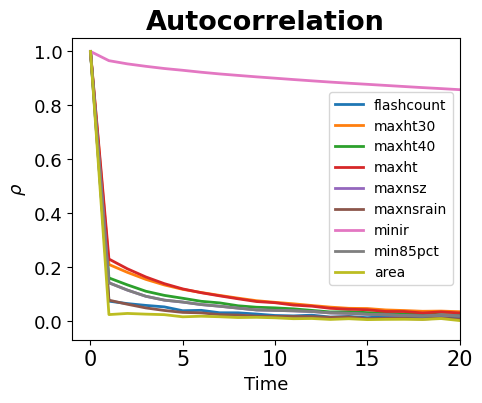

In [176]:
fig = plt.figure(figsize=(5,4))
plt.plot(np.arange(0,len(rho0),1),rho0,label='flashcount')
plt.plot(np.arange(0,len(rho1),1),rho1,label='maxht30')
plt.plot(np.arange(0,len(rho2),1),rho2,label='maxht40')
plt.plot(np.arange(0,len(rho3),1),rho3,label='maxht')
plt.plot(np.arange(0,len(rho4),1),rho4,label='maxnsz')
plt.plot(np.arange(0,len(rho5),1),rho5,label='maxnsrain')
plt.plot(np.arange(0,len(rho6),1),rho6,label='minir')
plt.plot(np.arange(0,len(rho7),1),rho4,label='min85pct')
plt.plot(np.arange(0,len(rho8),1),rho8,label='area')
plt.xlim(-1,20);
plt.title('Autocorrelation')
plt.legend(prop={'size':10})
plt.xlabel('Time')
plt.ylabel(r'$\rho$')
# plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW6/figs/Autocorrelation_TRMM.png',dpi=200,bbox_inches='tight')

Eyeballing the autocorrelation function when it approaches near zero. It seems around 10 samples in time is when it reaches approximately zero.

In [24]:
Nstar = 347864/10
print('Effective Sample Size due to memory:',Nstar)
eb = pve*np.sqrt(2./Nstar)

Effective Sample Size due to memory: 34786.4


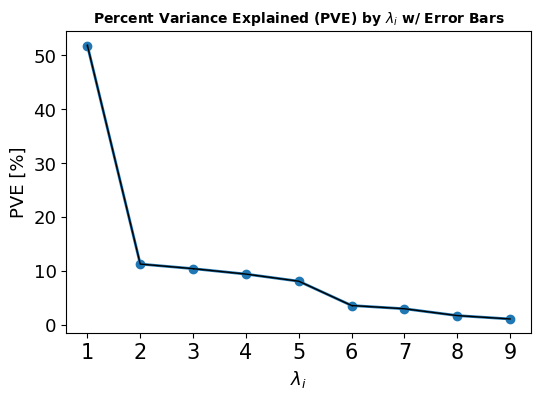

In [198]:
#### fig = plt.figure(figsize=(5,4))
plt.plot(pve,'-o')
plt.errorbar(np.arange(0,np.size(pve)),pve,yerr = eb/2, xerr = None, linewidth = 1, color = 'black')
plt.xticks(np.arange(0,np.size(pve)),[str(val) for val in np.arange(0,np.size((pve)))+1])
plt.ylabel('PVE [%]')
plt.xlabel(r'$\lambda_i$')
plt.title(r'Percent Variance Explained (PVE) by $\lambda_i$ w/ Error Bars',size=10);
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW6/figs/PVE_TRMM.png',dpi=200,bbox_inches='tight')

(c) Compute the leading 2 EOFs and PCs for the rest of the analysis (unless you wish to do more). That
is, regress the data (unweighted data if applicable) onto standardized values of the 2 leading PCs. You
should have one regression pattern for each PC - this is the EOF pattern associated with a 1 standard
deviation anomaly of the PC. Remember that the resulting patterns will be similar to the EOFs, but
not identical.

In [208]:
e1 = eig[:,0] # should be Nx1
z1 = np.dot(Xw,e1) # should be size M
e2 = eig[:,1]
z2 = np.dot(Xw,e2)

# standardize the PCs (sigma space now)
z1 = (z1-np.nanmean(z1))/np.nanstd(z1)
z2 = (z2-np.nanmean(z2))/np.nanstd(z2)

# physical space
d1 = (1./np.size(Xw, axis = 0))*np.dot(np.transpose(z1),X)
d2 = (1./np.size(Xw, axis = 0))*np.dot(np.transpose(z2),X)

# standardized space
d1s = (1./np.size(Xw, axis = 0))*np.dot(np.transpose(z1),Xw)
d2s = (1./np.size(Xw, axis = 0))*np.dot(np.transpose(z2),Xw)


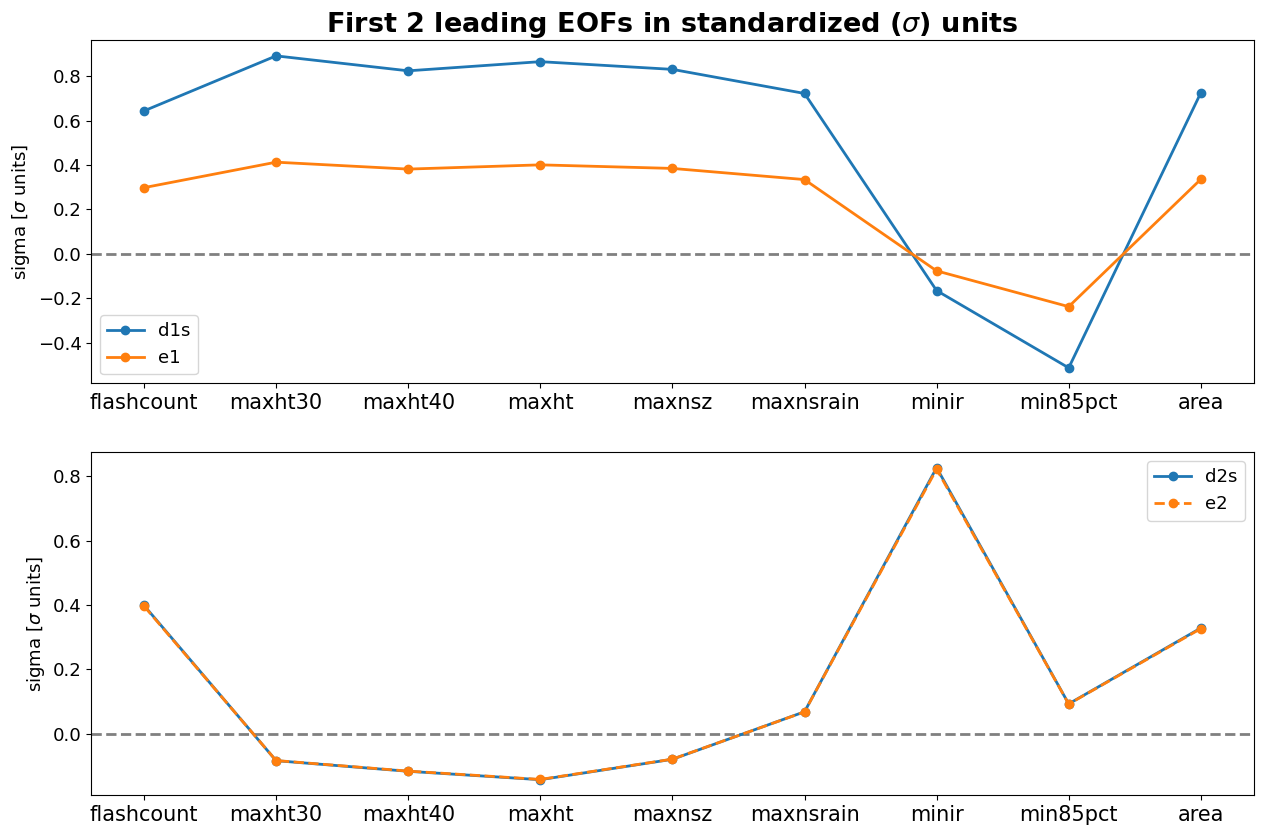

In [209]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
plt.axhline(0,linestyle='--',color='grey')
plt.plot(d1s,'-o',label='d1s'); # standardized PC1 units
plt.plot(e1,'-o',label='e1'); # EOF 
plt.legend()
plt.ylabel(r'sigma [$\sigma$ units]')
plt.xticks(np.arange(0,9,1),[str(var) for var in variables],size=15);
plt.title(r'First 2 leading EOFs in standardized ($\sigma$) units')

ax2 = fig.add_subplot(2,1,2)
plt.axhline(0,linestyle='--',color='grey')
plt.plot(d2s,'-o',label='d2s'); # standardized PC1 units
plt.plot(e2,'--o',label='e2'); # EOF 
plt.legend()
plt.ylabel(r'sigma [$\sigma$ units]')
plt.xticks(np.arange(0,9,1),[str(var) for var in variables],size=15);

# plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW6/figs/P1_EOF_standardized.png',dpi=200,bbox_inches='tight')

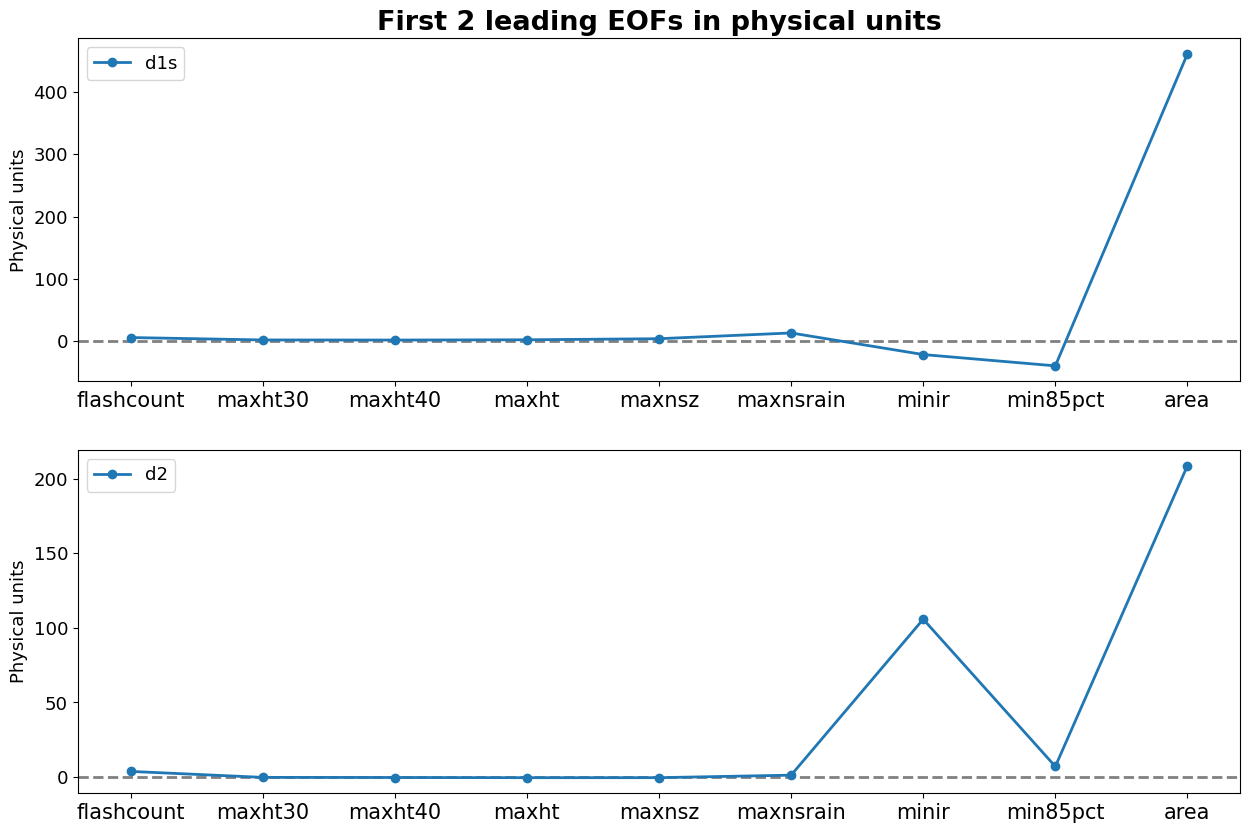

In [193]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(2,1,1)
plt.axhline(0,linestyle='--',color='grey')
plt.plot(d1,'-o',label='d1s'); # physical PC1 units
plt.legend()
plt.ylabel('Physical units')
plt.xticks(np.arange(0,9,1),[str(var) for var in variables],size=15);
plt.title(r'First 2 leading EOFs in physical units')

ax4 = fig.add_subplot(2,1,2)
plt.axhline(0,linestyle='--',color='grey')
plt.plot(d2,'-o',label='d2'); # physical PC1 units
plt.legend()
plt.ylabel('Physical units')
plt.xticks(np.arange(0,9,1),[str(var) for var in variables],size=15);

plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW6/figs/P1_EOF_physical.png',dpi=200,bbox_inches='tight')

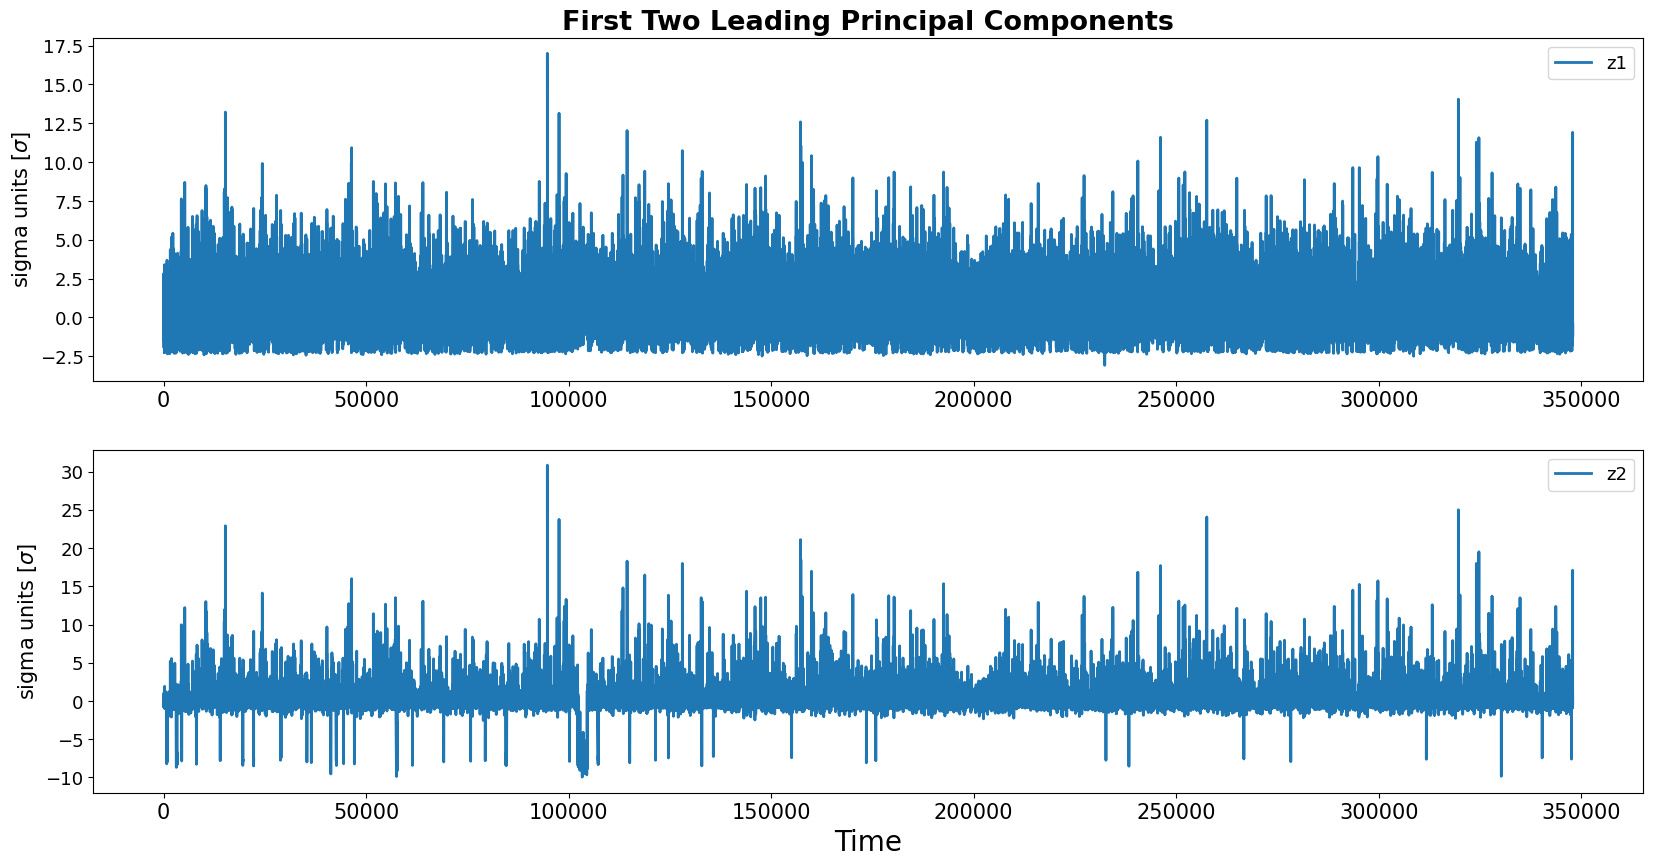

In [205]:
# plot the PCs
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
plt.plot(z1,label='z1')
plt.ylabel('sigma units [$\sigma$]',size=15)
plt.title('First Two Leading Principal Components')
plt.legend()
ax2 = fig.add_subplot(2,1,2)
plt.plot(z2,label='z2')
plt.xlabel('Time',size=20)

plt.ylabel('sigma units [$\sigma$]',size=15)
plt.legend()
plt.savefig('/Users/tyler/Desktop/SP22/ATS_606/figs/PCs_TRMM.png',dpi=200,bbox_inches='tight')

(d) Discuss your results. Which EOFs are significant? Was standardizing the data informative/useful?
Provide a physical interpretation for the first few EOFs of both the non-standardized data and the
standardized data and explain why they are (are not) different.


# Problem 2: EOFs of your own data

- https://climatedataguide.ucar.edu/climate-data/atlantic-multi-decadal-oscillation-amo [AMO]
- https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni [Nino3.4]
- https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao_index.html [NAO]
- https://www.ncdc.noaa.gov/teleconnections/pdo/ [PDO]
- MJO
- https://psl.noaa.gov/gcos_wgsp/Timeseries/Hurricane/ [ACE]

In [210]:
# # MJO
# mjo = open('/Users/tyler/Desktop/SP22/ATS_655/HW1/proj_norm_order.ascii.txt')
# mjo = mjo.readlines()

In [211]:
### functions ### 

def txt_file_parser(array):
    # array is are rows of data
    data = []
    
    for line in array:
        year = line.split()[0]
        month = line.split()[1:]
        for m in month:
            data.append([int(year),float(m)])
    data = np.array(data,dtype=float)
    return data

def time_mask(time_array, t_ini, t_fin):
    ini = np.where(time_array == t_ini)[0][0]
    fin = np.where(time_array == t_fin)[0][-1]
    return ini, fin

Parse through data files and X array for eigenanalysis

In [212]:
# AMO
ds = open('/Users/tyler/Desktop/SP22/ATS_655/HW6/data/amo_monthly_raw_1870-2020.txt')
ds = ds.readlines()
ds = ds[1:-1]
amo = txt_file_parser(ds)
ini,fin = time_mask(amo[:,0],1950,2019)
amo = amo[ini:fin,:]

# ENSO
ds = open('/Users/tyler/Desktop/SP22/ATS_655/HW6/data/nina34_index_monthly.txt')
ds = ds.readlines()
ds = ds[3:-4]
enso = txt_file_parser(ds)
ini,fin = time_mask(enso[:,0],1950,2019)
enso = enso[ini:fin,:]

# PDO
ds = open('/Users/tyler/Desktop/SP22/ATS_655/HW6/data/pdo_index.txt')
ds = ds.readlines()
ds = ds[2:-1]
pdo = txt_file_parser(ds)
ini,fin = time_mask(pdo[:,0],1950,2019)
pdo = pdo[ini:fin,:]

# ACE
ds = open('/Users/tyler/Desktop/SP22/ATS_655/HW6/data/ACE_NAtl_monthly.txt')
ds = ds.readlines()
ds = ds[1:170]
ace = txt_file_parser(ds)
ini,fin = time_mask(ace[:,0],1950,2019)
ace = ace[ini:fin,:]

###
# NAO
ds = open('/Users/tyler/Desktop/SP22/ATS_655/HW6/data/nao_monthly.txt')
ds = ds.readlines();ds
data = []
yr = []
mnth = []
for line in ds:
    yr = int(line.split()[0])
    mnth = float(line.split()[2])
    data.append([yr,mnth])
    nao = np.asarray(data,dtype=float)
ini,fin = time_mask(nao[:,0],1950,2019)
nao = nao[ini:fin,:]

# check shape
for data in [amo,enso,pdo,ace,nao]:
    print(np.shape(data))
    
# stack data
X = np.stack([amo[:,1],nao[:,1],enso[:,1],pdo[:,1],ace[:,1]],axis=1)
Xw = X.copy()

# try looking at hurricane season only
mask = ace[:,1] > 0
X=X[mask]
Xw=Xw[mask]


# standardize data
for i in np.arange(0,5):
    X[:,i] = (X[:,i] - np.mean(X[:,i]))
    Xw[:,i] = (Xw[:,i] - np.mean(Xw[:,i]))/np.std(Xw[:,i])
    
np.shape(Xw)

(839, 2)
(839, 2)
(839, 2)
(839, 2)
(839, 2)


(356, 5)

###### (a) Calculate the EOFs and PCs using. Specify whether you standardized your data or not.

- Data is standardized

In [213]:
# calculate covariance matrix
print('C shape:',np.shape(Xw))
C = calc_covariance_matrix(Xw,size='N')[0]

# calculate eigenvalues and eigenvectors of C; lam should be 9x1, E should be 9x9
lam, eig = LA.eig(C)
print('lambda matrix shape:',np.shape(lam))
print('e shape:',np.shape(eig))

# sort eigenvalues and vector by the largest to smallest eigenvalues
i = np.flipud(np.argsort(lam))
lam = lam[i]
eig = eig[:,i] 

# convert eigenvalues to percent variance explained
pve = 100.*lam/np.sum(lam)

C shape: (356, 5)
lambda matrix shape: (5,)
e shape: (5, 5)


(b) Plot the eigenvalues (scaled as the percent variance explained), with error bars following either North
et al. (1982) or another method of your choice. For full points be sure to clearly describe how you
determined the effective degrees of freedom N∗

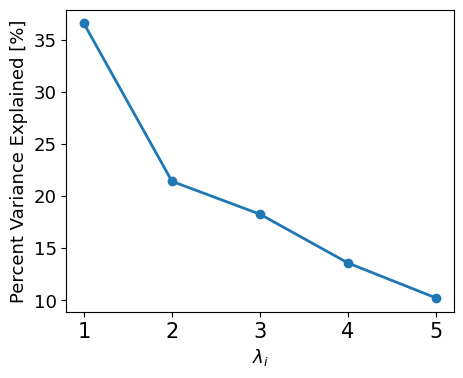

In [214]:
fig = plt.figure(figsize=(5,4))
plt.plot(np.arange(0,5),pve,'-o')
plt.ylabel('Percent Variance Explained [%]')
plt.xlabel(r'$\lambda_i$')
plt.xticks(np.arange(0,5),[str(val) for val in np.arange(0,5)+1]);
# plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW6/figs/P2_PVE.png',dpi=200,bbox_inches='tight')

### (c) Compute the leading 2 EOFs and PCs for the rest of the analysis (unless you wish to do more). That
is, regress the data (unweighted data if applicable) onto standardized values of the 2 leading PCs. You
should have one regression pattern for each PC - this is the EOF pattern associated with a 1 standard
deviation anomaly of the PC. Remember that the resulting patterns will be similar to the EOFs, but
not identical.

In [215]:
e1 = eig[:,0] # should be Nx1
z1 = np.dot(Xw,e1) # should be size M

e2 = eig[:,1]
z2 = np.dot(Xw,e2)

e3 = eig[:,2] # should be Nx1
z3 = np.dot(Xw,e3) # should be size M

e4 = eig[:,3]
z4 = np.dot(Xw,e4)

# standardize the PCs
z1 = (z1-np.nanmean(z1))/np.nanstd(z1)
z2 = (z2-np.nanmean(z2))/np.nanstd(z2)
z3 = (z3-np.nanmean(z3))/np.nanstd(z3)
z4 = (z4-np.nanmean(z4))/np.nanstd(z4)

# PC in physical units
d1 = (1./np.size(X, axis = 0))*np.dot(np.transpose(z1),X)
d2 = (1./np.size(X, axis = 0))*np.dot(np.transpose(z2),X)
d3 = (1./np.size(X, axis = 0))*np.dot(np.transpose(z3),X)
d4 = (1./np.size(X, axis = 0))*np.dot(np.transpose(z4),X)

# PC in standardized/weighted units
d1s = (1./np.size(Xw, axis = 0))*np.dot(np.transpose(z1),Xw)
d2s = (1./np.size(Xw, axis = 0))*np.dot(np.transpose(z2),Xw)
d3s = (1./np.size(Xw, axis = 0))*np.dot(np.transpose(z3),Xw)
d4s = (1./np.size(Xw, axis = 0))*np.dot(np.transpose(z4),Xw)

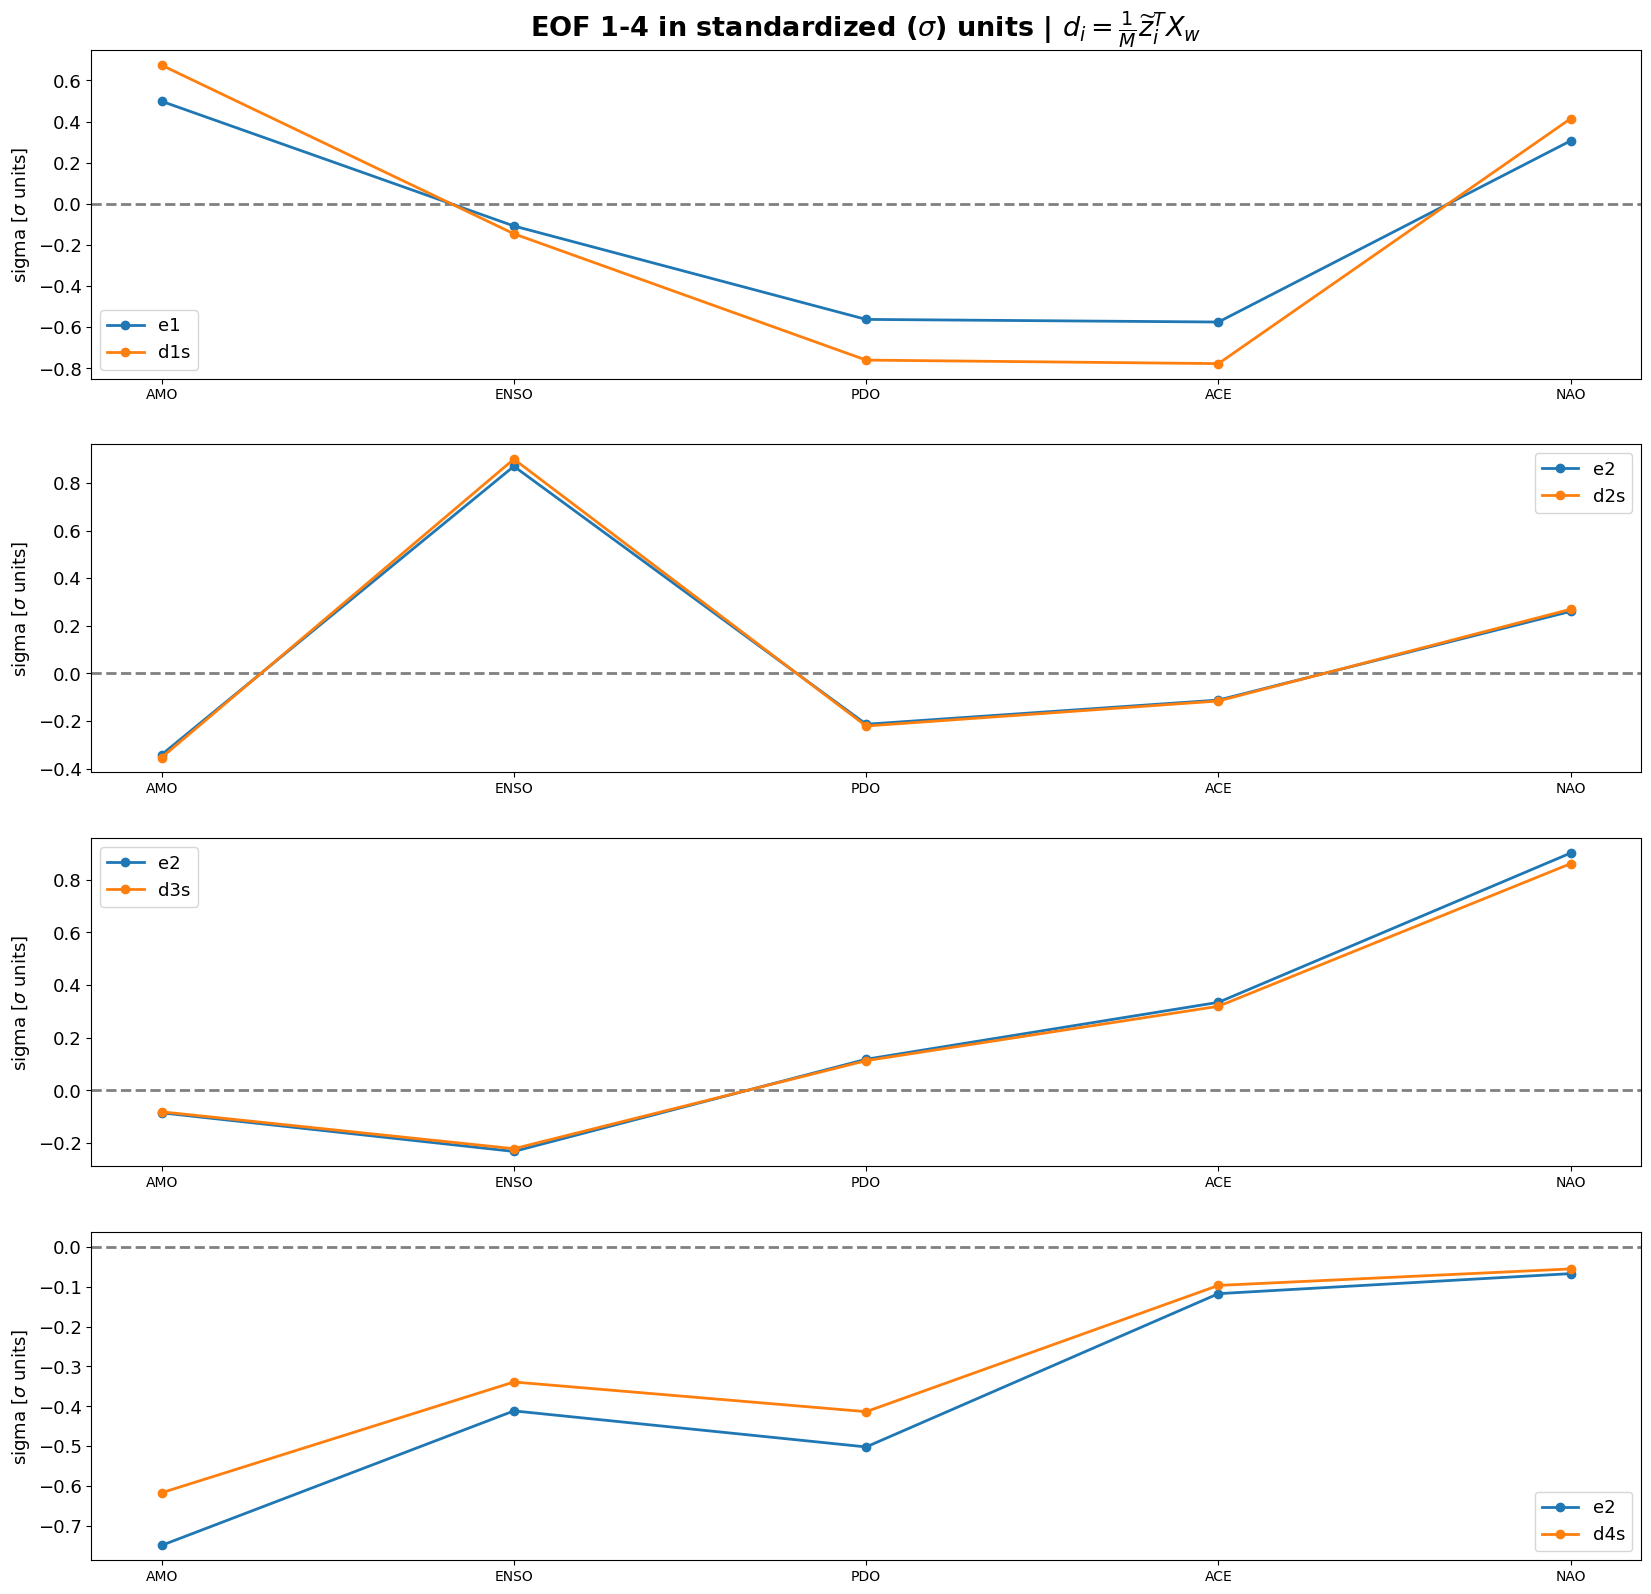

In [216]:
variables = ['AMO','ENSO','PDO','ACE','NAO']
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(4,1,1)
plt.axhline(0,linestyle='--',color='grey')
plt.plot(e1,'-o',label='e1'); # EOF 
# plt.plot(d1,'-o',label='d1'); # physical units
plt.plot(d1s,'-o',label='d1s'); # standardized PC1 units

plt.legend()
plt.ylabel(r'sigma [$\sigma$ units]')
plt.xticks(np.arange(0,len(variables),1),[str(var) for var in variables],size=10);
plt.title(r'EOF 1-4 in standardized ($\sigma$) units | $d_{i} = \frac{1}{M} \widetilde{z}^{T}_{i}X_w$ ')

ax2 = fig.add_subplot(4,1,2)
plt.axhline(0,linestyle='--',color='grey')
plt.plot(e2,'-o',label='e2'); # EOF 
# plt.plot(d2,'-o',label='d1'); # physical units
plt.plot(d2s,'-o',label='d2s'); # standardized PC1 units

plt.legend()
plt.ylabel(r'sigma [$\sigma$ units]')
plt.xticks(np.arange(0,len(variables),1),[str(var) for var in variables],size=10);

ax3 = fig.add_subplot(4,1,3)
plt.axhline(0,linestyle='--',color='grey')
plt.plot(e3,'-o',label='e2'); # EOF 
# plt.plot(d3,'-o',label='d3'); # physical units
plt.plot(d3s,'-o',label='d3s'); # standardized PC1 units

plt.legend()
plt.ylabel(r'sigma [$\sigma$ units]')
plt.xticks(np.arange(0,len(variables),1),[str(var) for var in variables],size=10);

ax4 = fig.add_subplot(4,1,4)
plt.axhline(0,linestyle='--',color='grey')
plt.plot(e4,'-o',label='e2'); # EOF 
# plt.plot(d4,'-o',label='d4'); # physical units
plt.plot(d4s,'-o',label='d4s'); # standardized PC1 units

plt.legend()
plt.ylabel(r'sigma [$\sigma$ units]')
plt.xticks(np.arange(0,len(variables),1),[str(var) for var in variables],size=10);

# plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW6/figs/P2_eof_d1s.png',dpi=400,bbox_inches='tight')

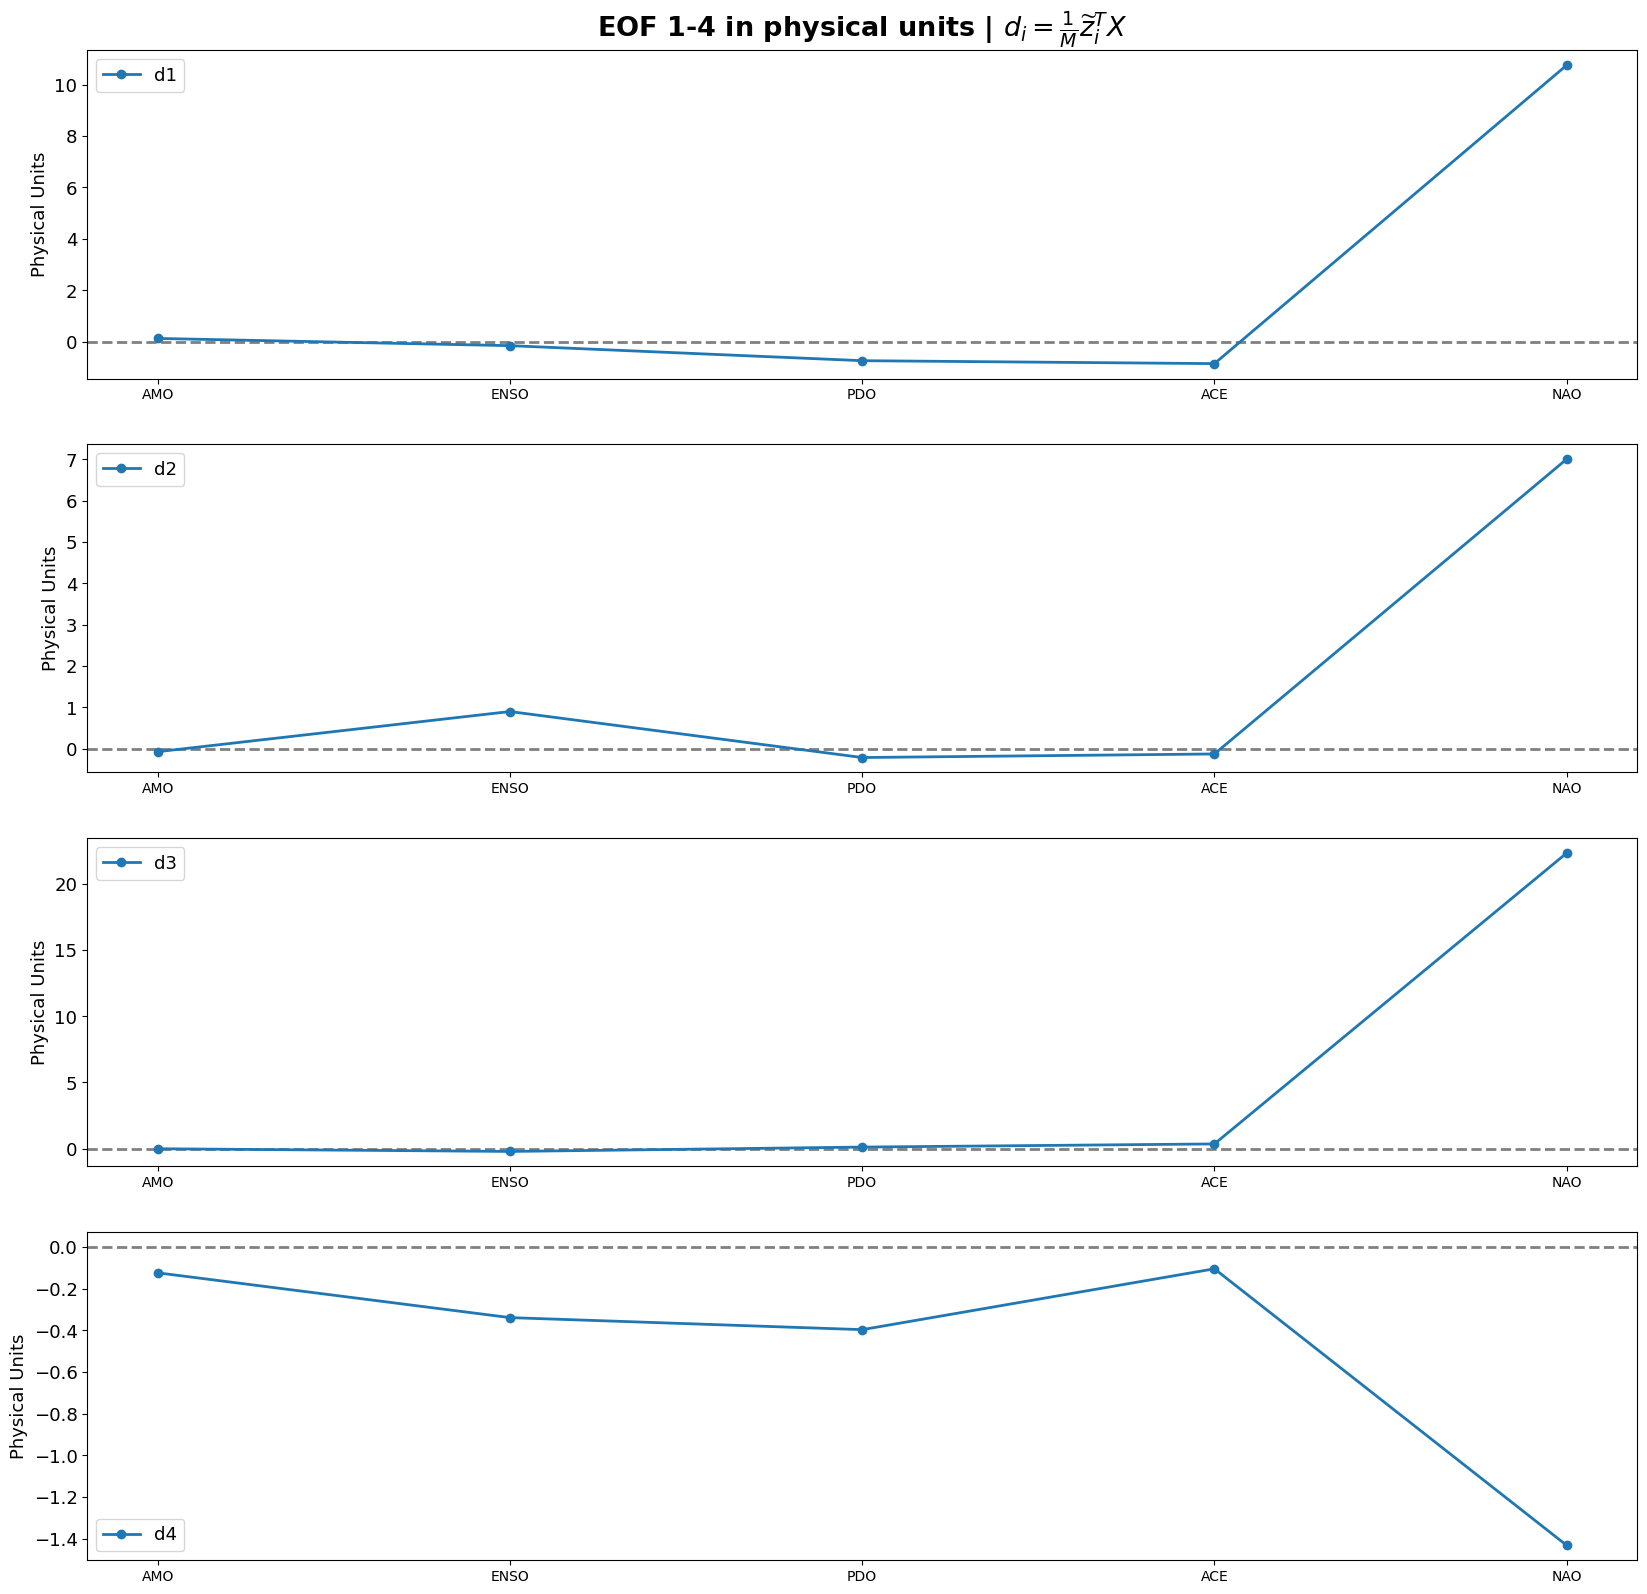

In [147]:
variables = ['AMO','ENSO','PDO','ACE','NAO']
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(4,1,1)
plt.axhline(0,linestyle='--',color='grey')
# plt.plot(e1,'-o',label='e1'); # EOF 
plt.plot(d1,'-o',label='d1'); # physical units
# plt.plot(d1s,'-o',label='d1s'); # standardized PC1 units

plt.legend()
plt.ylabel('Physical Units')
plt.xticks(np.arange(0,len(variables),1),[str(var) for var in variables],size=10);
plt.title(r'EOF 1-4 in physical units | $d_{i} = \frac{1}{M} \widetilde{z}^{T}_{i}X$')

ax2 = fig.add_subplot(4,1,2)
plt.axhline(0,linestyle='--',color='grey')
# plt.plot(e2,'-o',label='e2'); # EOF 
plt.plot(d2,'-o',label='d2'); # physical units
# plt.plot(d2s,'-o',label='d2s'); # standardized PC1 units

plt.legend()
plt.ylabel('Physical Units')
plt.xticks(np.arange(0,len(variables),1),[str(var) for var in variables],size=10);

ax3 = fig.add_subplot(4,1,3)
plt.axhline(0,linestyle='--',color='grey')
# plt.plot(e3,'-o',label='e2'); # EOF 
plt.plot(d3,'-o',label='d3'); # physical units
# plt.plot(d3s,'-o',label='d3s'); # standardized PC1 units
plt.legend()
plt.ylabel('Physical Units')
plt.xticks(np.arange(0,len(variables),1),[str(var) for var in variables],size=10);

ax4 = fig.add_subplot(4,1,4)
plt.axhline(0,linestyle='--',color='grey')
# plt.plot(e4,'-o',label='e2'); # EOF 
plt.plot(d4,'-o',label='d4'); # physical units
# plt.plot(d4s,'-o',label='d4s'); # standardized PC1 units
plt.legend()
plt.ylabel('Physical Units')
plt.xticks(np.arange(0,len(variables),1),[str(var) for var in variables],size=10);

# plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW6/figs/P2_d1.png',dpi=200,bbox_inches='tight')

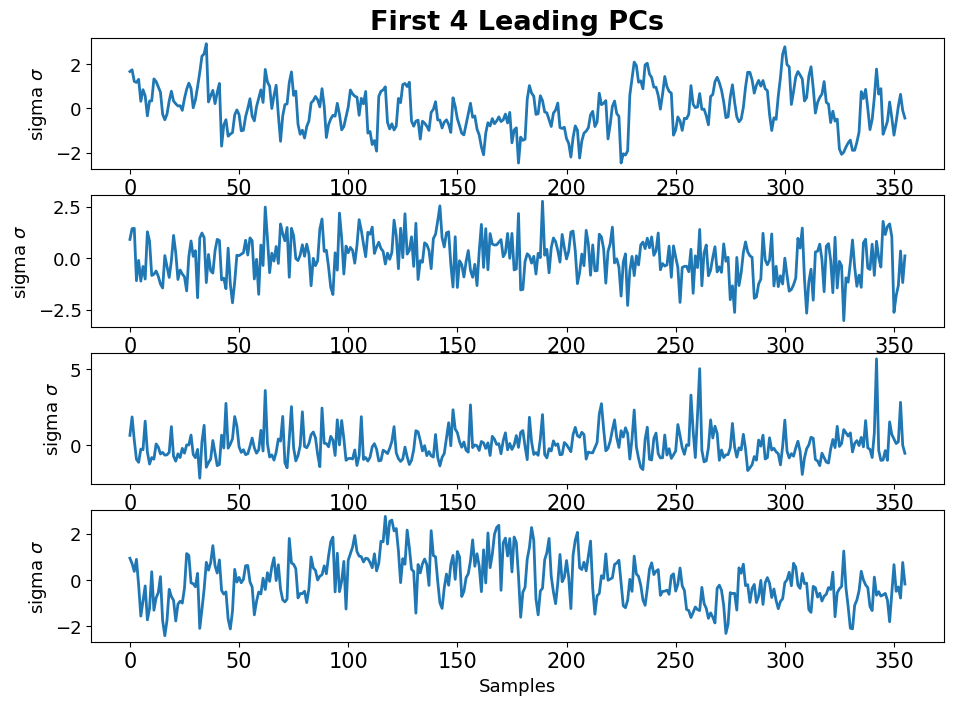

In [222]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(4,1,1)
plt.plot(z1,label='z1')
plt.ylabel(r'sigma $\sigma$')
plt.title('First 4 Leading PCs')
ax2 = fig.add_subplot(4,1,2)
plt.plot(z2,label='z2')
plt.ylabel(r'sigma $\sigma$')
ax3 = fig.add_subplot(4,1,3)
plt.plot(z3,label='z3')
plt.ylabel(r'sigma $\sigma$')
ax4 = fig.add_subplot(4,1,4)
plt.plot(z4,label='z4')
plt.xlabel('Samples')
plt.ylabel(r'sigma $\sigma$')
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW6/figs/P2_PCs.png',dpi=200,bbox_inches='tight')

NAO:
- +NAO: 
1. shift of jetstream poleward,
2. force tripole pattern of SST characterized by anomalous warmth off US East coast, anomalous cold in Tropical Atl ( due to stronger than normal trade winds due to enhanced bermuda high), mid northern atlantic, normal temps
3. anomalously strong Azores and Icelandic Low
- -NAO:
1. stronger and weaker low ( both are anomalously low )
2. blocking over atlantic leads to meander of jet stream poleward 
3. decreased storminess/precip/lower temps in Northern Europe; warmer,wetter in Southern Europe.
4. lower air pressure and stronger cold air outbreaks in Eastern North America

PDO: 
https://climateimpactcompany.com/february-2022-pdo-amo-outlook-2-2/
PDO tends to parallel la nina 